In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [2]:
s = str.maketrans('', '', punctuation)
a = 'salam!@'
a.translate(s)

'salam'

In [3]:
stop_words = stopwords.words('english')

In [4]:
negative_documents = []
max_len_negative = 0
for file in os.listdir('data/neg'):
    with open('data/neg/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_negative:
            max_len_negative = len(tokens)
        negative_documents.append(' '.join(tokens))
len(negative_documents)

1000

In [5]:
max_len_negative

1400

In [6]:
positive_documents = []
max_len_positive = 0
for file in os.listdir('data/pos'):
    with open('data/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        positive_documents.append(' '.join(tokens))
len(positive_documents)

1000

In [7]:
max_len_positive

1693

In [8]:
max_len = max(max_len_negative, max_len_positive)

In [9]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [10]:
X_train = negative_documents[:800] + positive_documents[:800]

In [11]:
len(X_train)

1600

In [12]:
y_train = [0 for _ in range(800)] + [1 for _ in range(800)]

In [13]:
len(y_train)

1600

In [14]:
X_test = negative_documents[800:] + positive_documents[800:]
len(X_test)

400

In [15]:
y_test = [0 for _ in range(200)] + [1 for _ in range(200)]

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

In [17]:
max_len

1693

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [19]:
import pickle
with open('tokenizer.h5', 'wb') as f:
    pickle.dump(tokenizer, f)

In [21]:
vocab_len = len(tokenizer.word_index) + 1

In [22]:
vocab_len

40425

In [23]:
encoded = tokenizer.texts_to_sequences(X_train)

In [24]:
encoded[0]

[11440,
 5815,
 8588,
 1285,
 387,
 17,
 7887,
 23,
 4799,
 76,
 468,
 966,
 18202,
 4800,
 11441,
 2464,
 967,
 89,
 297,
 8589,
 23769,
 2150,
 382,
 57,
 1077,
 136,
 12,
 1171,
 211,
 2,
 577,
 1355,
 384,
 2361,
 857,
 351,
 3,
 3344,
 10257,
 1646,
 1285,
 223,
 18203,
 18204,
 9303,
 324,
 9304,
 1137,
 816,
 577,
 1355,
 317,
 3,
 10258,
 1078,
 2604,
 2465,
 6530,
 1285,
 110,
 821,
 3448,
 432,
 64,
 23770,
 3,
 1355,
 5815,
 27,
 11440,
 5815,
 12945,
 3449,
 1079,
 23771,
 586,
 273,
 170,
 2308,
 258,
 11440,
 5815,
 633,
 6913,
 3664,
 640,
 6914,
 4239,
 18205,
 261,
 18206,
 377,
 9305,
 6913,
 6135,
 16,
 2737,
 1743,
 9306,
 437,
 744,
 1286,
 752,
 2362,
 23772,
 7373,
 10259,
 6136,
 5526,
 718,
 3345,
 2465,
 11440,
 5815,
 156,
 633,
 1444,
 132,
 14,
 3932,
 315,
 224,
 280,
 23773,
 4240,
 1837,
 6,
 3932,
 197,
 5,
 4,
 3449,
 524,
 1236,
 924,
 911,
 745,
 2543,
 1062,
 1777,
 186,
 1,
 4,
 68,
 1337,
 2544,
 93,
 1462,
 610,
 311,
 1445,
 7374,
 325,
 11440,


In [25]:
padded = pad_sequences(encoded, maxlen=max_len, padding='post')

In [26]:
padded.shape

(1600, 1693)

In [27]:
input1 = Input(shape=(max_len,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
dense1 = Dense(10, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(dense1)

In [28]:
model = Model(inputs=[input1], outputs=output)

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1693)]            0         
                                                                 
 embedding (Embedding)       (None, 1693, 100)         4042500   
                                                                 
 conv1d (Conv1D)             (None, 1690, 32)          12832     
                                                                 
 dropout (Dropout)           (None, 1690, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 845, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 27040)             0         
                                                             

In [31]:
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [32]:
padded_test.shape

(400, 1693)

In [33]:
import numpy as np

In [34]:
model.fit([padded], np.array(y_train), epochs=10, batch_size=20, validation_data=([padded_test], np.array(y_test)))

Epoch 1/10
80/80 [==============================] - 18s 209ms/step - loss: 0.6907 - accuracy: 0.5275 - val_loss: 0.6925 - val_accuracy: 0.5150
Epoch 2/10
80/80 [==============================] - 16s 205ms/step - loss: 0.4969 - accuracy: 0.8281 - val_loss: 0.4591 - val_accuracy: 0.8225
Epoch 3/10
80/80 [==============================] - 16s 202ms/step - loss: 0.0670 - accuracy: 0.9875 - val_loss: 0.5094 - val_accuracy: 0.7650
Epoch 4/10
80/80 [==============================] - 15s 188ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.3628 - val_accuracy: 0.8475
Epoch 5/10
80/80 [==============================] - 15s 188ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3573 - val_accuracy: 0.8525
Epoch 6/10
80/80 [==============================] - 16s 198ms/step - loss: 9.2963e-04 - accuracy: 1.0000 - val_loss: 0.3580 - val_accuracy: 0.8500
Epoch 7/10
80/80 [==============================] - 15s 190ms/step - loss: 6.4855e-04 - accuracy: 1.0000 - val_loss: 0.3576 - val_accuracy

In [35]:
model.save('textcnn.h5')

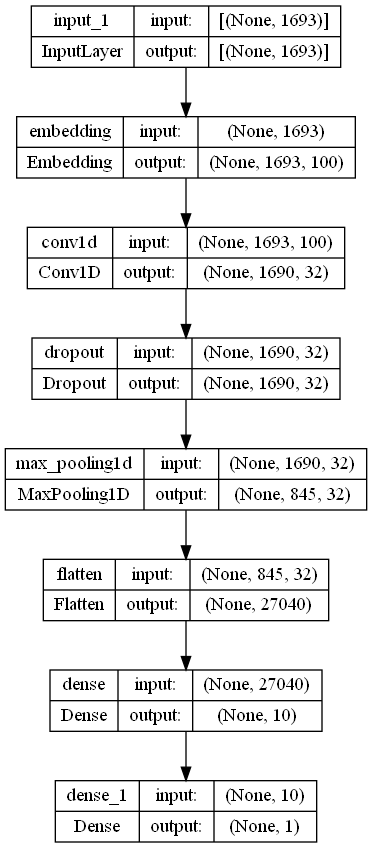

In [36]:
plot_model(model, show_shapes=True)

In [37]:
from tensorflow.keras.models import load_model

In [38]:
model = load_model('textcnn.h5')

In [39]:
with open('tokenizer.h5', 'rb') as f:
    tokenizer = pickle.load(f)

In [40]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'time': 7,
 'good': 8,
 'would': 9,
 'story': 10,
 'much': 11,
 'character': 12,
 'also': 13,
 'get': 14,
 'two': 15,
 'characters': 16,
 'first': 17,
 'see': 18,
 'well': 19,
 'could': 20,
 'way': 21,
 'make': 22,
 'films': 23,
 'really': 24,
 'life': 25,
 'little': 26,
 'plot': 27,
 'people': 28,
 'bad': 29,
 'scene': 30,
 'never': 31,
 'man': 32,
 'best': 33,
 'many': 34,
 'scenes': 35,
 'new': 36,
 'movies': 37,
 'know': 38,
 'great': 39,
 'director': 40,
 'another': 41,
 'action': 42,
 'love': 43,
 'end': 44,
 'go': 45,
 'something': 46,
 'still': 47,
 'made': 48,
 'back': 49,
 'us': 50,
 'seems': 51,
 'work': 52,
 'world': 53,
 'big': 54,
 'however': 55,
 'makes': 56,
 'every': 57,
 'though': 58,
 'better': 59,
 'audience': 60,
 'around': 61,
 'seen': 62,
 'performance': 63,
 'enough': 64,
 'role': 65,
 'real': 66,
 'take': 67,
 'gets': 68,
 'going': 69,
 'last': 70,
 'years': 71,
 'may': 72,
 'look': 73,
 'no

In [ ]:
model.predict()